# Part 6 Machine Learning and Deep NLP

*Christina Brockway*

### Tasks:

**Machine Learning Model**
-  Drop any reviews that don't have a rating
-  Use original review column as X and classification as y
-  Use modeling pipelines with text vectorizer and model in same pipeline
    -  Select a sklearn vectorizer
    -  Select a Classificatation model
-  Fit and evaluate the model
-  Document observations from results 

**Improve Model GridSearch Text Vectorization**
-  Construct a grid of parameters
-  Fit and evaluate grid search results
-  Document:
    -  What were best parameters?
    -  How does the best estimator perform? 

**Deep NLP (RNN)**
-  Create train/test/validation datasets
    -  Convert target categories to integers using LabelEncoder
    -  Create tensorflow dataset using X and y
    -  Split data
-  Create Keras Text Vectorization Layer
    -  Create Keras Text Vectorization layer for RNN model
    -  Fit/Adapt on training text
    -  Save Vocabulary size to use in embedding layer
-  Build RNN
-  Fit and Evaluate the model
-  Document observations

#### Load Data and Imports

In [1]:
    !pip install Unidecode

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from imblearn.under_sampling import RandomUnderSampler
from sklearn import set_config
set_config(transform_output='pandas')


from sklearn import metrics
pd.set_option('display.max_colwidth',300)

import nltk
from nltk.tokenize import word_tokenize
from nltk import TweetTokenizer
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

import spacy
nlp=spacy.load('en_core_web_sm')

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import joblib


%load_ext autoreload
%autoreload 2
import my_functions as mf


In [3]:
import sys, os
# Check sys.path for python path
sys.path
#Get the absolute file path of parent directory
os.path.abspath('../')
#Add parent directory to python path
sys.path.append( os.path.abspath('../'))


In [4]:
df = joblib.load('data-NLP/processed_data.joblib')
df.head(1)

,review,rating,html,length,tokens,lemmas,tokens-joined,lemmas-joined
1,"a guilty pleasure for me personally, as i love both 'the great escape' and most of the works i have seen, over the years, from this rightfully-esteemed british animation company. highly recommended both for children and for adults who enjoy animation.",9.0,NaN,251,"[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 8647
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review         2422 non-null   object 
 1   rating         2422 non-null   float64
 2   html           160 non-null    object 
 3   length         2422 non-null   int64  
 4   tokens         2422 non-null   object 
 5   lemmas         2422 non-null   object 
 6   tokens-joined  2422 non-null   object 
 7   lemmas-joined  2422 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 170.3+ KB


In [6]:
#drop reviews without a rating and irrelevent columns
#There are no rows without ratings
df=df.drop(columns=(['html', 'length','tokens','lemmas','tokens-joined','lemmas-joined']))
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 8647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  2422 non-null   object 
 1   rating  2422 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.8+ KB


In [7]:
#Split into high and low reviews
dff = df.copy()
def rating_groups(x):
    if x>=8.5:
        return "high"
    elif x <=4.0:
        return "low"
    else: 
        return None

In [8]:
dff['label'] = df['rating'].map(rating_groups)
dff['label'].value_counts()

low     1223
high    1199
Name: label, dtype: int64

In [9]:
dff.head(2)

,review,rating,label
1,"a guilty pleasure for me personally, as i love both 'the great escape' and most of the works i have seen, over the years, from this rightfully-esteemed british animation company. highly recommended both for children and for adults who enjoy animation.",9.0,high
6,"the first underwhelmed me, but this one straight-up bored me. again, of course seeing hunt climb a mountain without a harness is impressive sure. and i even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\neven setting it in predom...",3.0,low


In [10]:
dff=dff.drop(columns=('rating'))

### Machine Learning Model

In [11]:
#Define X and y
X=dff['review']
y=dff['label']

#Train Test Split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
y_train.value_counts(normalize=True)

high    0.503855
low     0.496145
Name: label, dtype: float64

In [12]:
len(X_test)

606

In [13]:
len(X_train)

1816

In [14]:
#Create pipeline

# Select a sklearn vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words ='english')

#Use RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

rfc_pipe = Pipeline([('vectorizer', tfidf_vectorizer), ('classifier', rfc)])


In [15]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('classifier', RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       915
         low       1.00      1.00      1.00       901

    accuracy                           1.00      1816
   macro avg       1.00      1.00      1.00      1816
weighted avg       1.00      1.00      1.00      1816



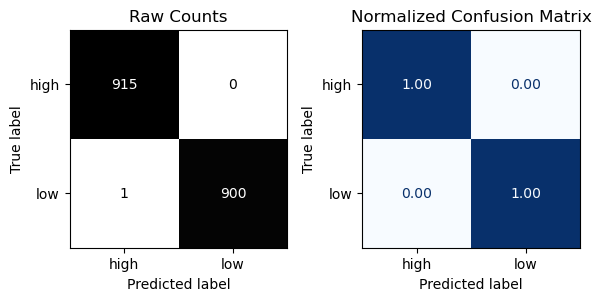


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.82      0.86      0.84       284
         low       0.87      0.83      0.85       322

    accuracy                           0.84       606
   macro avg       0.84      0.84      0.84       606
weighted avg       0.84      0.84      0.84       606



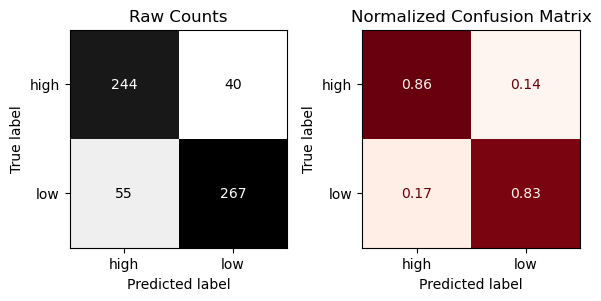

In [16]:
mf.evaluate_classification(rfc_pipe, X_train, y_train, X_test, y_test)

**Observations**

-  Overall the model perfoms well.  It fit perfectly on training data.
-  On testing data it has 84% accuracy
-  This model predicts high slightly better than low.

### Improve Model GridSearch Text Vectorization

In [17]:
gridsearch_pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                            ('classifier', RandomForestClassifier())])


In [18]:
gridsearch_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', TfidfVectorizer()),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'vectorizer': TfidfVectorizer(),
 'classifier': RandomForestClassifier(),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.float64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__norm': 'l2',
 'vectorizer__preprocessor': None,
 'vectorizer__smooth_idf': True,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__sublinear_tf': False,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__use_idf': True,
 'vectorizer__vocabulary': None,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight

In [19]:
# Define params to try for both vectorizers
param_grid_shared = {
    "vectorizer__max_df": [0.7, 0.8, 0.9],
    'vectorizer__min_df': [ 2, 3, 4 ], 
    "vectorizer__max_features": [None, 1000, 2000]}

# Setting params for the count vectorizer
param_grid_count = {
    'vectorizer':[CountVectorizer()],
    **param_grid_shared}


# Setting params for tfidf vectorizer 
param_grid_tfidf = {
    'vectorizer': [TfidfVectorizer()],
    "vectorizer__norm": ["l1", "l2"],
    "vectorizer__use_idf": [True, False],
    **param_grid_shared}

# Setting params for RandomForest Classifier
param_grid_rfc = {
    'classifier__bootstrap': [True, False],
    'classifier__random_state': [42]}

    

# combine into list of params
params_combined = [param_grid_count, param_grid_tfidf, param_grid_rfc]

In [20]:
gridsearch = GridSearchCV(gridsearch_pipe, params_combined, cv=4, verbose=1, n_jobs=-1)

gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 137 candidates, totalling 548 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'vectorizer': [CountVectorizer(max_df=0.7, min_df=2)],
                          'vectorizer__max_df': [0.7, 0.8, 0.9],
                          'vectorizer__max_features': [None, 1000, 2000],
                          'vectorizer__min_df': [2, 3, 4]},
                         {'vectorizer': [TfidfVectorizer()],
                          'vectorizer__max_df': [0.7, 0.8, 0.9],
                          'vectorizer__max_features': [None, 1000, 2000],
                          'vectorizer__min_df': [2, 3, 4],
                          'vectorizer__norm': ['l1', 'l2'],
                          'vectorizer__use_idf': [True, False]},
                         {'classifier__bootstrap': [True, False],
                          'classifier__random_state': [42]}],
             verbose=1)

In [21]:
# Obtain the best combination directly
gridsearch.best_params_

{'vectorizer': CountVectorizer(max_df=0.7, min_df=2),
 'vectorizer__max_df': 0.7,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 2}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       915
         low       1.00      1.00      1.00       901

    accuracy                           1.00      1816
   macro avg       1.00      1.00      1.00      1816
weighted avg       1.00      1.00      1.00      1816



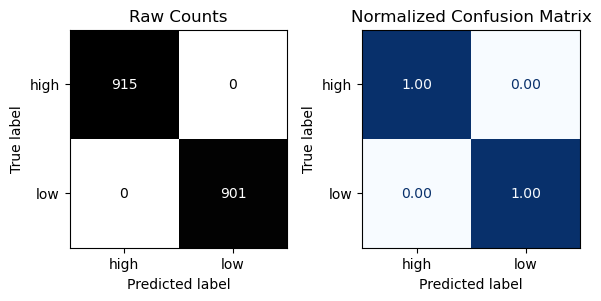


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.80      0.86      0.83       284
         low       0.87      0.81      0.84       322

    accuracy                           0.83       606
   macro avg       0.84      0.84      0.83       606
weighted avg       0.84      0.83      0.84       606



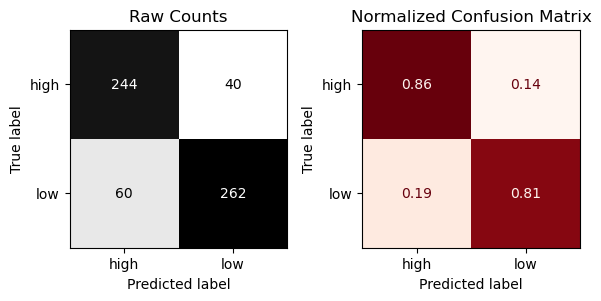

In [22]:
# Now define the best version of the model
best_model = gridsearch.best_estimator_

# Predict and Evaluate with the custom function
mf.evaluate_classification(best_model, X_train, y_train, X_test, y_test)

**Observations**

-  Overall the model perfoms well.  It fit perfectly on training data.
-  On testing data it has 83% accuracy
-  This model is slightly better at predicting high than low 
-  This model does not perform as well as the original model
-  The following are the best parameters: {'vectorizer': CountVectorizer(max_df=0.7, min_df=2),
 'vectorizer__max_df': 0.7,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 2}  

## Deep NLP (RNNs) with Keras Text Vectorization Layer

In [23]:
## Encode the string lables as numeric with LabelEncoder()

# Define X and y
X=dff['review']
y_string=dff['label']
# Instantiate the LabelEncoder
encoder = LabelEncoder()
# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y_string))
y.value_counts()

1    1223
0    1199
dtype: int64

In [24]:
# Convert to Dataset object
ds = tf.data.Dataset.from_tensor_slices((X, y))
# shuffling the data once
ds = ds.shuffle(buffer_size=len(ds), reshuffle_each_iteration=False)


In [25]:
import math

##Train/Val/Test Split
BATCH_SIZE =32
# Samples for training 
split_train = 0.7
n_train_samples =  int(len(ds) * split_train)
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")

# Samples for validation
split_val = 0.2
n_val_samples = int(len(ds) * split_val)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")

# Samples for test
split_test = 1 - (split_train + split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")

    - train:	1695 samples 	(53 batches)
    - val:  	484 samples 	(16 batches)
    - test: 	243 samples 	(8 batches)


In [26]:
## Shuffling just the training data  
train_ds  = train_ds.shuffle(buffer_size = len(train_ds))

In [27]:
# Get just the text from ds_train
ds_texts = train_ds.map(lambda x, y: x)


In [ ]:
# Create Text Vectorization Layer
text_vectorization_layer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="count",
)
# Build the vectorizer vocabulary
text_vectorization_layer.adapt(ds_texts)
# Confrim vocabulary size
VOCAB_SIZE = text_vectorization_layer.vocabulary_size()

## this was saved as SQ_LENGTH
SEQUENCE_LENGTH = 150

# Define output dimension
EMBED_DIM = 100

# Define classes variable
classes = y.unique()
classes

In [29]:
def build_gru_model_pool(text_vectorization_layer):
    
    gru_model_pool = Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=VOCAB_SIZE,
                      output_dim=EMBED_DIM,
                      input_length=SEQUENCE_LENGTH)])
        
   # Stack three GrU layers    
    gru_model_pool.add(layers.GRU(128, return_sequences=True))
    gru_model_pool.add(layers.Dropout(.5))
    gru_model_pool.add(layers.GRU(128, return_sequences=True))
    gru_model_pool.add(layers.Dropout(.5))         
    gru_model_pool.add(layers.GRU(128, return_sequences = True)) 
   
    # Add a pooling layer 
    gru_model_pool.add(layers.GlobalMaxPooling1D())
    
    # Output layer
    gru_model_pool.add(layers.Dense(len(classes), activation='softmax'))
                     
    optimizer = optimizers.legacy.Adam()
    gru_model_pool.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    gru_model_pool.summary()
    return gru_model_pool

In [30]:
# Include callbacks
def get_callbacks(patience=3, monitor='val_accuracy'):
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
    return [early_stop]


In [ ]:
# Build the model
model = build_gru_model_pool(text_vectorization_layer)

#Fit the model
EPOCHS = 20
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks())

In [ ]:
# Obtain the results
results = mf.evaluate_classification_network(
    model, X_train=train_ds, 
    X_test=test_ds, history=history);

In [ ]:
**Observations**

-  Overall the model perfoms well.  It fit perfectly on training data.
-  On testing data it has 81% accuracy
-  This model is better at predicting high than low 
-  This model does not perform as well as the original model